In [1]:
!pip install ucimlrepo

In [2]:
import warnings
warnings.filterwarnings('ignore')

# data manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

# data visulization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
apartment_for_rent_classified = fetch_ucirepo(id=555)

# data (as pandas dataframes)
X = apartment_for_rent_classified.data.features
y = apartment_for_rent_classified.data.targets

# metadata
print(apartment_for_rent_classified.metadata)

# variable information
print(apartment_for_rent_classified.variables)

{'uci_id': 555, 'name': 'Apartment for Rent Classified', 'repository_url': 'https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified', 'data_url': 'https://archive.ics.uci.edu/static/public/555/data.csv', 'abstract': 'This is a dataset of classified for apartments for rent in USA.\n', 'area': 'Business', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 10000, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': None, 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5X623', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "The dataset contains of 10'000 or 100'000 rows and of 22 columns The data has been cleaned in the way that \r\ncolumn price and square_feet never is empty but the dataset is saved as it was created.\r\n\r\n

In [4]:
data = X

In [5]:
data.head()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,Cats,2195.0,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,"Cats,Dogs",1250.0,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,None,1395.0,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,"Cats,Dogs",1600.0,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,"Cats,Dogs",975.0,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09


In [6]:
data.shape

(99826, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99826 entries, 0 to 99825
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99826 non-null  object 
 1   title          99826 non-null  object 
 2   body           99826 non-null  object 
 3   amenities      83749 non-null  object 
 4   bathrooms      99760 non-null  object 
 5   bedrooms       99699 non-null  object 
 6   currency       99822 non-null  object 
 7   fee            99823 non-null  object 
 8   has_photo      99823 non-null  object 
 9   pets_allowed   44267 non-null  object 
 10  price          99821 non-null  float64
 11  price_display  99820 non-null  object 
 12  price_type     99823 non-null  object 
 13  square_feet    99823 non-null  object 
 14  address        7946 non-null   object 
 15  cityname       99521 non-null  object 
 16  state          99521 non-null  object 
 17  latitude       99797 non-null  float64
 18  longit

In [8]:
data[data['category'] == '2']

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
75947,2,2,USD,No,Thumbnail,"Cats,Dogs",1019,1019,Monthly,823,NaN,Henrico,VA,37.6249,-77.4948,RentDigs.com,1550831790,NaN,NaN,NaN,NaN


In [9]:
data['bathrooms'].unique()

array(['1', '1.5', '2', '2.5', '3', '3.5', '4', '7', '4.5', nan, '5', '8',
       '8.5', '6', '5.5', 'No', '9', '7.5', 'Thumbnail', 1.0, 2.0, 2.5,
       1.5, 4.0, 3.0, 3.5, 4.5], dtype=object)

In [10]:
for index,i in enumerate(data['price_display'].astype('str')):
    if i.startswith('$'):
        data['price_display'] = data['price_display'].drop(index,axis=0)

In [11]:
data['bathrooms'].unique()

array(['1', '1.5', '2', '2.5', '3', '3.5', '4', '7', '4.5', nan, '5', '8',
       '8.5', '6', '5.5', 'No', '9', '7.5', 'Thumbnail', 1.0, 2.0, 2.5,
       1.5, 4.0, 3.0, 3.5, 4.5], dtype=object)

In [12]:
data['bathrooms'] = data['bathrooms'].astype('str').replace(['No','Thumbnail'],np.NaN)
data['bedrooms']= data['bedrooms'].astype('str').replace(['Cats,Dogs','Thumbnail'],np.NaN)

In [13]:
# data[data['price_display'] == 'Henrico']
data['price_display'] = data['price_display'].replace('Henrico',np.NaN)

In [14]:
data['square_feet']= data['square_feet'].replace(['NJ','CA'],np.NaN)

In [15]:
data['bedrooms']= data['bedrooms'].replace('nan',np.NaN)
data['bathrooms']= data['bathrooms'].replace('nan',np.NaN)

In [16]:
data['bathrooms'] = pd.to_numeric(data['bathrooms'])
data['bedrooms'] = pd.to_numeric(data['bedrooms'])
data['price_display'] = pd.to_numeric(data['price_display'])
data['square_feet']= pd.to_numeric(data['square_feet'])

In [17]:
round(data.isnull().sum() / (data.count() + data.isnull().sum()) * 100,2)

category          0.00
title             0.00
body              0.00
amenities        16.11
bathrooms         0.07
bedrooms          0.13
currency          0.00
fee               0.00
has_photo         0.00
pets_allowed     55.66
price             0.01
price_display     0.04
price_type        0.00
square_feet       0.01
address          92.04
cityname          0.31
state             0.31
latitude          0.03
longitude         0.03
source            0.01
time              0.01
dtype: float64

In [18]:
data.isnull().sum()

category             0
title                0
body                 0
amenities        16077
bathrooms           69
bedrooms           130
currency             4
fee                  3
has_photo            3
pets_allowed     55559
price                5
price_display       39
price_type           3
square_feet          5
address          91880
cityname           305
state              305
latitude            29
longitude           31
source               6
time                 6
dtype: int64

In [19]:
data['category'].unique()

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term', 'Gym', 'housing/rent',
       'Parking,Patio/Deck', 'housing/rent/condo', 'housing/rent/other',
       'housing/rent/commercial/retail', '2'], dtype=object)

In [20]:
data[data['category'] == '2']

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
75947,2,2,USD,No,NaN,NaN,1019,1019,Monthly,823,NaN,NaN,VA,37.6249,-77.4948,RentDigs.com,1550831790,NaN,NaN,NaN,NaN


In [21]:
data.drop(75947,inplace=True)

In [22]:
data.columns

Index(['category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

In [23]:
data['currency'].unique()

array(['USD', nan, 'Cats,Dogs'], dtype=object)

In [24]:
data[data['currency'] == 'Cats,Dogs']

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
8808,Gym,1,1,USD,NaN,NaN,"Cats,Dogs",1380,1380,Monthly,713.0,NaN,Lawrence,NaN,40.2659,-74.6959,RentDigs.com,1.568782e+09,NaN,NaN,NaN


In [25]:
data.drop(8808,inplace=True)

In [26]:
data['price_type'].unique()

array(['Monthly', 'Weekly', 'Monthly|Weekly', nan, 'Los Angeles'],
      dtype=object)

In [27]:
data[(data['price_type'] == 'Weekly') | (data['price_type'] == 'Monthly|Weekly') | (data['price_type'] == 'Los Angeles')]

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
6729,housing/rent/apartment,Studio Cottage 214,"New Bern Studio includes : 1 beds, 1 microwave...","AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",1560.0,NaN,Weekly,200.0,NaN,New Bern,NC,3.508470e+01,-77.0609,ListedBuy,1.576618e+09
7245,housing/rent/apartment,A-P-T Suites Lakeland - Low Weekly & Monthly R...,A-P-T Suites is your next Extended Stay! We ha...,"Cable or Satellite,Pool,Refrigerator,Storage,TV",NaN,NaN,USD,No,Thumbnail,"Cats,Dogs",275.0,NaN,Monthly|Weekly,300.0,NaN,Lakeland,FL,2.804510e+01,-81.9689,ListedBuy,1.574891e+09
33780,"Parking,Patio/Deck",1,1,USD,NaN,NaN,NaN,2150,2150,Monthly,792.0,NaN,Los Angeles,NaN,34.0432,-118.2509,RentDigs.com,1.568745e+09,NaN,NaN,NaN
50211,housing/rent/apartment,"Beautiful, Private and Convenient in Nw Woods",WebID 1087137 Rental Registration #: 18-843 Th...,"AC,Fireplace,Patio/Deck,Pool,TV",4.0,4.0,USD,No,No,NaN,8500.0,NaN,Weekly,3600.0,7 Passing Road,East Hampton,NY,4.100200e+01,-72.1796,Nest Seekers,1.569319e+09
83729,housing/rent/apartment,2 BR 2.5 BA APARTMENT $850 PER WEEK (Upper Eas...,"An extremely great opportunity to lease a 2,32...",Elevator,2.5,2.0,USD,No,Thumbnail,NaN,850.0,NaN,Weekly,2326.0,NaN,New York,NY,4.072470e+01,-73.9545,SpreadMyAd,1.547858e+09


In [28]:
data.drop([6729,7245,33780,50211,83729],inplace=True)

In [29]:
data.head(1)

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,Cats,2195.0,2195.0,Monthly,542.0,507 509 Esplanade,Redondo Beach,CA,33.852,-118.3759,RentLingo,1.577360e+09


In [30]:
data['bathrooms'] = round(data['bathrooms'])

In [31]:
data.select_dtypes(np.number).isnull().sum()

bathrooms         65
bedrooms         126
price              4
price_display     32
square_feet        3
latitude          28
longitude         28
time               3
dtype: int64

In [32]:
data.select_dtypes('object').isnull().sum()

category            0
title               0
body                0
amenities       16077
currency            3
fee                 3
has_photo           3
pets_allowed    55557
price_type          3
address         91877
cityname          305
state             305
source              3
dtype: int64

In [33]:
data = data.drop(columns=['currency','has_photo','pets_allowed','price_type','address','state','source','price_display','latitude','longitude','time'],axis=1)

In [34]:
data = data.drop(columns=['fee'],axis=1)

In [35]:
data.select_dtypes(np.number).isna().sum()
# number_cols = number_cols.drop('price')

bathrooms       65
bedrooms       126
price            4
square_feet      3
dtype: int64

In [36]:
data.select_dtypes('object').isna().sum()

category         0
title            0
body             0
amenities    16077
cityname       305
dtype: int64

In [37]:
# numeric cols
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms'].median())
data['bedrooms'] =  data['bedrooms'].fillna(data['bedrooms'].median())
data['price'] = data['price'].fillna(data['price'].mean())
data['square_feet'] = data['square_feet'].fillna(data['square_feet'].mean())

# categorical cols
data['amenities'] = data['amenities'].fillna(data['amenities'].mode()[0])
data['cityname'] =  data['cityname'].fillna(data['cityname'].mode()[0])

In [38]:
data.isna().sum()

category       0
title          0
body           0
amenities      0
bathrooms      0
bedrooms       0
price          0
square_feet    0
cityname       0
dtype: int64

In [39]:
data['bathrooms'] = data['bathrooms'].astype('int')
data['bedrooms'] = data['bedrooms'].astype('int')
data['square_feet'] = data['square_feet'].astype('int')

In [40]:
data.sample(5)

,category,title,body,amenities,bathrooms,bedrooms,price,square_feet,cityname
96679,housing/rent/apartment,"Gorgeous Baltimore, Two BR, Two BA. Offstreet ...","TowsonTown Apartments in Towson, MD offer reso...","Gym,Parking,Pool,Tennis",2,2,1290.0,1100,Baltimore
81858,housing/rent/apartment,One BR Apartment in Omaha. Single Car Garage!,"Square footage: 715 square ft, unit number: 30...",Parking,1,1,995.0,715,Omaha
37966,housing/rent/apartment,One BR Apartment in Quiet Building - Manitou S...,Adorable quiet apartment in Crystal Hills of M...,"Cable or Satellite,Fireplace,Internet Access,P...",1,1,950.0,1588,Manitou Springs
45834,housing/rent/apartment,Two BR Apartment - Welcome Home Welcome to Gas...,A residential community featuring two beds apa...,Parking,1,2,1150.0,850,Dallas
54269,housing/rent/apartment,"Average Rent $1,450 a month - That's a STEAL!",the you'll love tohome. Choose from hi-rise or...,"Gym,Parking",1,2,1450.0,742,Annandale


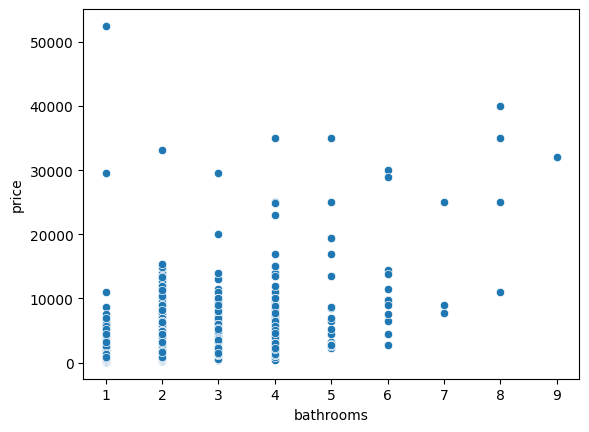

In [41]:
sns.scatterplot(data=data,x='bathrooms',y='price')
plt.show()

In [42]:
data.query('bathrooms==1 & price > 40000')

,category,title,body,amenities,bathrooms,bedrooms,price,square_feet,cityname
6863,housing/rent/apartment,Studio apartment for rent,Barstow It's 14/18ft. studio apartment furnish...,"AC,Cable or Satellite,Internet Access,Patio/De...",1,0,52500.0,1418,Barstow


In [43]:
# sns.scatterplot(data=data,x=data['price'],y=data['bathrooms'])
data.query('bathrooms>5 & bedrooms>5').index

Int64Index([477, 3180, 3487, 3907, 38679, 38776, 41018, 41235, 45876, 47748], dtype='int64')

In [44]:
data = data.drop([477, 3180, 3487, 3907, 38679, 38776, 41018, 41235, 45876, 47748,6863],axis=0)

In [45]:
data.drop(columns=['title','body'],axis=1,inplace=True)

In [46]:
data.sample(3)

,category,amenities,bathrooms,bedrooms,price,square_feet,cityname
80888,housing/rent/apartment,Parking,1,1,2730.0,699,Los Angeles
96336,housing/rent/apartment,Parking,1,1,695.0,580,Mesa
74350,housing/rent/apartment,"Clubhouse,Gym,Patio/Deck,Pool,Tennis",1,1,750.0,726,Overland Park


In [47]:
data['category'].unique()

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term', 'housing/rent', 'housing/rent/condo',
       'housing/rent/other', 'housing/rent/commercial/retail'],
      dtype=object)

In [48]:
data[(data['category'] == 'housing/rent') | (data['category'] =='housing/rent/short_term')].index

Int64Index([7056, 7119, 11977, 50709, 51956, 57533, 62949, 69147, 76329, 91599,
            92904],
           dtype='int64')

In [49]:
data.drop([7056, 7119, 11977, 50709, 51956, 57533, 62949, 69147, 76329, 91599,92904],axis=0,inplace=True)

In [50]:
for i in data['category'].unique():
    print(i)

housing/rent/apartment
housing/rent/home
housing/rent/condo
housing/rent/other
housing/rent/commercial/retail


In [51]:
filtered_data = data[(data['category'] == 'housing/rent/home') | (data['category'] == 'housing/rent/condo') | (data['category'] == 'housing/rent/other') | (data['category'] == 'housing/rent/commercial/retail')].index

In [52]:
data.drop(filtered_data,axis=0,inplace=True)

In [53]:
data['category']= data['category'].str.replace('housing/rent/apartment','apartment')

In [54]:
data.drop(columns=['amenities'],inplace=True)

In [55]:
data.sample(10)

,category,bathrooms,bedrooms,price,square_feet,cityname
36496,apartment,2,2,1700.0,1215,Cherry Hill
76284,apartment,1,1,1605.0,880,Sterling
66120,apartment,2,2,2510.0,1059,Mc Lean
94270,apartment,1,1,995.0,772,Douglasville
28941,apartment,2,2,2900.0,1200,Englewood
77453,apartment,2,2,963.0,1068,Minot
20790,apartment,2,3,914.0,1260,Decatur
70383,apartment,2,2,2950.0,1877,Denver
21654,apartment,1,2,1183.0,875,New London
90818,apartment,3,2,1950.0,1680,Chapel Hill


In [56]:
# data.select_dtypes('object')
# pd.get_dummies(data,dtype='int')

In [57]:
features = data[['category','bathrooms','bedrooms','square_feet','cityname']]
target = data['price']

In [58]:
all_features = pd.get_dummies(features,dtype='int')

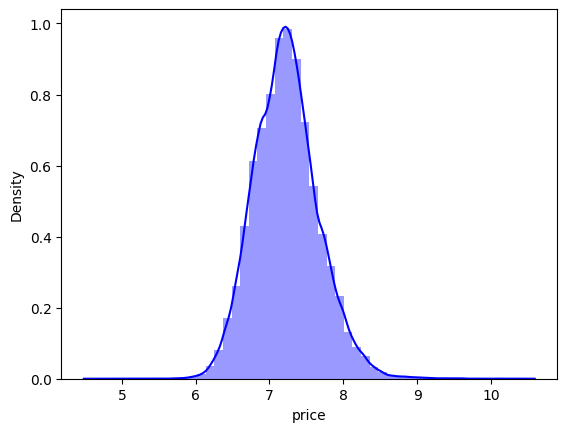

In [59]:
log_target = np.log1p(data['price'])

sns.distplot(log_target,color='blue')
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_features,log_target, test_size=.2,random_state=42)


In [61]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [62]:
pred = lr.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(pred,y_test))
r2score = r2_score(pred,y_test)

print(f'RMSE      : {rmse}')
print(f'r2_score  : {r2score}')

RMSE      : 1516234.197330062
r2_score  : -0.001511717114913269


In [64]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [65]:
dtr_pred = dtr.predict(X_test)

In [66]:
dtr_rmse = np.sqrt(mean_squared_error(y_test,dtr_pred))
dtr_r2score = r2_score(dtr_pred,y_test)

print(f'RMSE      : {dtr_rmse}')
print(f'r2_score  : {dtr_r2score}')

RMSE      : 0.2715056289781964
r2_score  : 0.5505486506588033


In [67]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(metric='euclidean',n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [68]:
knn_pred = knn.predict(X_test)

In [69]:
knn_rmse = np.sqrt(mean_squared_error(y_test,knn_pred))
knn_r2score = r2_score(y_test,knn_pred)

print(f'RMSE      : {knn_rmse}')
print(f'r2_score  : {knn_r2score}')

RMSE      : 0.3414397314140341
r2_score  : 0.3925224592028844


In [70]:
!pip install --upgrade xgboost  

In [71]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
xgb_pred = xgb.predict(X_test)

In [73]:
xgb_rmse = np.sqrt(mean_squared_error(y_test,xgb_pred))
xgb_r2score = r2_score(y_test,xgb_pred)

print(f'RMSE      : {xgb_rmse}')
print(f'r2_score  : {xgb_r2score}')

RMSE      : 0.28541873126376116
r2_score  : 0.5755103980253053


In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [76]:
np.round(X_train_scaled.describe(),1)

bathrooms  bedrooms  square_feet  category_apartment  \
count    79797.0   79797.0      79797.0             79797.0   
mean         0.0       0.0          0.0                 0.0   
std          1.0       1.0          1.0                 0.0   
min         -0.8      -2.3         -2.0                 0.0   
25%         -0.8      -1.0         -0.5                 0.0   
50%         -0.8       0.4         -0.1                 0.0   
75%          1.0       0.4          0.4                 0.0   
max         10.3       9.7        116.2                 0.0   

       cityname_Abbeville  cityname_Aberdeen  cityname_Abilene  \
count             79797.0            79797.0           79797.0   
mean                 -0.0               -0.0              -0.0   
std                   1.0                1.0               1.0   
min                  -0.0               -0.0              -0.0   
25%                  -0.0               -0.0              -0.0   
50%                  -0.0               -0.0              -0.0   
75%                  -0.0               -0.0              -0.0   
max                 126.3               64.8             115.3   

       cityname_Abingdon  cityname_Abington  cityname_Absecon  cityname_Acton  \
count            79797.0            79797.0           79797.0         79797.0   
mean                -0.0               -0.0               0.0            -0.0   
std                  1.0                1.0               1.0             1.0   
min                 -0.0               -0.0              -0.0            -0.0   
25%                 -0.0               -0.0              -0.0            -0.0   
50%                 -0.0               -0.0              -0.0            -0.0   
75%                 -0.0               -0.0              -0.0            -0.0   
max                 50.7               47.7              44.7            70.6   

       cityname_Acworth  cityname_Addison  cityname_Adelanto  \
count           79797.0           79797.0            79797.0   
mean                0.0               0.0               -0.0   
std                 1.0               1.0                1.0   
min                -0.0              -0.0               -0.0   
25%                -0.0              -0.0               -0.0   
50%                -0.0              -0.0               -0.0   
75%                -0.0              -0.0               -0.0   
max               126.3              38.4              141.2   

       cityname_Adelphi  cityname_Agawam  cityname_Agoura Hills  \
count           79797.0          79797.0                79797.0   
mean               -0.0              0.0                   -0.0   
std                 1.0              1.0                    1.0   
min                -0.0             -0.0                   -0.0   
25%                -0.0             -0.0                   -0.0   
50%                -0.0             -0.0                   -0.0   
75%                -0.0             -0.0                   -0.0   
max               282.5            199.7                  115.3   

       cityname_Aiea  cityname_Aiken  cityname_Akron  cityname_Alameda  \
count        79797.0         79797.0         79797.0           79797.0   
mean            -0.0             0.0             0.0              -0.0   
std              1.0             0.0             1.0               1.0   
min             -0.0             0.0            -0.0              -0.0   
25%             -0.0             0.0            -0.0              -0.0   
50%             -0.0             0.0            -0.0              -0.0   
75%             -0.0             0.0            -0.0              -0.0   
max            282.5             0.0            25.2             141.2   

       cityname_Alanson  cityname_Albany  cityname_Albemarle  \
count           79797.0          79797.0             79797.0   
mean                0.0             -0.0                 0.0   
std                 0.0              1.0                 0.0   
min       

In [77]:
scaled_lr = LinearRegression()
scaled_lr.fit(X_train_scaled,y_train)

LinearRegression()

In [78]:
scaled_pred_lr = scaled_lr.predict(X_test_scaled)

In [79]:
np.exp(y_test)

91884    1396.0
1939     1326.0
57505    1635.0
11509    1966.0
36905     549.0
          ...  
65876     601.0
60805    1350.0
86713    1350.0
38900    1561.0
31016    2446.0
Name: price, Length: 19950, dtype: float64

In [80]:
np.exp(scaled_pred_lr)

array([1447.83835482, 1309.31590424, 1703.68779987, ..., 1154.17647847,
       1557.92655144, 2013.20713944])

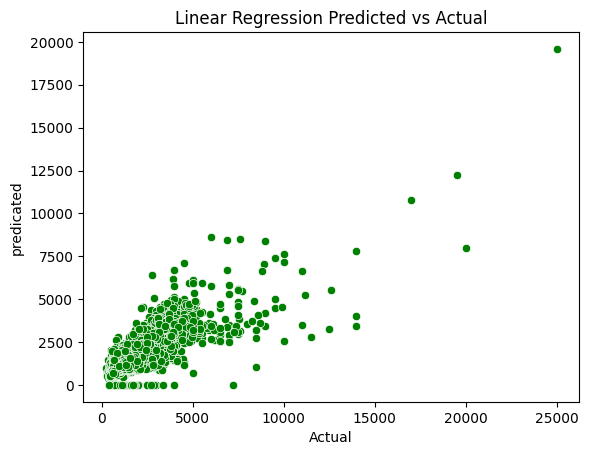

In [81]:
sns.scatterplot(x=np.exp(y_test),y=np.exp(scaled_pred_lr),color='green')
plt.title('Linear Regression Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('predicated')
plt.show()

In [82]:
xgb_scaled = XGBRegressor()
xgb_scaled.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [83]:
scaled_pred = xgb_scaled.predict(X_test_scaled)

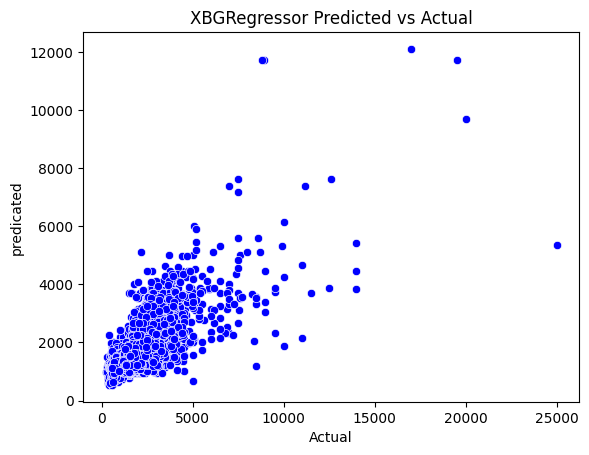

In [84]:
sns.scatterplot(x=np.exp(y_test),y=np.exp(scaled_pred),color='blue')
plt.title('XBGRegressor Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('predicated')
plt.show()

In [85]:
# from sklearn.ensemble import StackingRegressor
# from sklearn.ensemble import RandomForestRegressor

# estimators = [
#     ('lr',lr),
#     ('dtr',dtr),
#     ('knn',knn),
#     ('xgb',xgb)
# ]

# reg = StackingRegressor(
#     estimators=estimators,
#     final_estimator = DecisionTreeRegressor()
# )

In [86]:
# reg.fit(X_train,y_train)

In [87]:
# stack_pred = reg.predict(X_test)

In [88]:
# stack_rmse = np.sqrt(mean_squared_error(y_test,stack_pred))
# stack_r2score = r2_score(y_test,stack_pred)

# print(f'RMSE      : {stack_rmse}')
# print(f'r2_score  : {stack_r2score}')

In [89]:
# from sklearn.ensemble import RandomForestRegressor

# rfr = RandomForestRegressor()
# rfr.fit(X_train,y_train)

In [90]:
# rfr_pred = rfr.predict(X_test)

In [91]:
# rfr_rmse = np.sqrt(mean_squared_error(rfr_pred,y_test))
# rfr_r2score = r2_score(rfr_pred,y_test)

# print(f'RMSE      : {rfr_rmse}')
# print(f'r2_score  : {rfr_r2score}')

In [92]:
# sns.distplot(data['price'])
# sns.distplot(np.log1p(data['price']))

In [93]:
# from sklearn.preprocessing import OneHotEncoder

# cat_cols = data.select_dtypes('object').columns.tolist()
# ohe = OneHotEncoder(sparse_output=False)
# one_hot_encoded = ohe.fit_transform(data[cat_cols])
# data2 = pd.DataFrame(one_hot_encoded,columns=ohe.get_feature_names_out(cat_cols))

# data3 = pd.concat([data,data2],axis=1)
# data3 = data3.drop(cat_cols,axis=1)